### Importaci√≥n de datos



In [ ]:
#Instalando librerias que podria ocupar
#%pip install pandas
#%pip install matplotlib
#%pip install seaborn

import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

## Por defecto .head() retorna las primeras 5 filas , si quiero ver mas debo colocar mas como argumento
##Ejemplo para ver las primeras 10 filas del primer link
tienda.head(10)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Producto Categor√≠a del Producto     Precio  \
0          Asistente virtual           Electr√≥nicos   164300.0   
1            Mesa de comedor                Muebles   192300.0   
2              Juego de mesa               Juguetes   209600.0   
3                 Microondas      Electrodom√©sticos   757500.0   
4           Silla de oficina                Muebles   335200.0   
5    Bloques de construcci√≥n               Juguetes    24200.0   
6                Mu√±eca beb√©               Juguetes    44200.0   
7               Lavavajillas      Electrodom√©sticos  1189700.0   
8           Lavadora de ropa      Electrodom√©sticos  1518200.0   
9  Carrito de control remoto               Juguetes    75200.0   

   Costo de env√≠o Fecha de Compra         Vendedor Lugar de Compra  \
0          6900.0      16/01/2021      Pedro Gomez          Bogot√°   
1          8400.0      18/05/2022  Beatriz Morales        Medell√≠n   
2         15900.0      15/03/2021   Juan Fernandez       Cartagena   
3         41000.0      03/05/2022   Juan Fernandez            Cali   
4         20200.0      07/11/2020    Maria Alfonso        Medell√≠n   
5             0.0      03/12/2020  Beatriz Morales            Cali   
6             0.0      07/08/2021   Juan Fernandez          Bogot√°   
7         63700.0      18/06/2021    Felipe Santos     Santa Marta   
8         79000.0      08/01/2022  Izabela de Le√≥n          Bogot√°   
9          5100.0      24/02/2020  Beatriz Morales          Bogot√°   

   Calificaci√≥n      M√©todo de pago  Cantidad de cuotas       lat       lon  
0             4  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1             1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2             1  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3             4               Nequi                   1   3.43722 -76.52250  
4             5               Nequi                   1   6.25184 -75.56359  
5             5               Cup√≥n                   1   3.43722 -76.52250  
6             3               Nequi                   1   4.60971 -74.08175  
7             5  Tarjeta de cr√©dito                  10  11.24079 -74.19904  
8             1  Tarjeta de cr√©dito                   5   4.60971 -74.08175  
9             5               Nequi                   1   4.60971 -74.08175

#1. An√°lisis de facturaci√≥n



In [53]:
# Ingreso total de cada tienda
ingreso_tienda_1 = tienda['Precio'].sum()
ingreso_tienda_2 = tienda2['Precio'].sum()
ingreso_tienda_3 = tienda3['Precio'].sum()
ingreso_tienda_4 = tienda4['Precio'].sum()

# Mostrar con separador de miles usando puntos (estilo CLP)
def formato_clp(valor):
    return f"$ CLP {valor:,.0f}".replace(",", ".")

print("Ingresos totales por tienda:")
print(f"Tienda 1: {formato_clp(ingreso_tienda_1)}")
print(f"Tienda 2: {formato_clp(ingreso_tienda_2)}")
print(f"Tienda 3: {formato_clp(ingreso_tienda_3)}")
print(f"Tienda 4: {formato_clp(ingreso_tienda_4)}")

Ingresos totales por tienda:
Tienda 1: $ CLP 1.150.880.400
Tienda 2: $ CLP 1.116.343.500
Tienda 3: $ CLP 1.098.019.600
Tienda 4: $ CLP 1.038.375.700


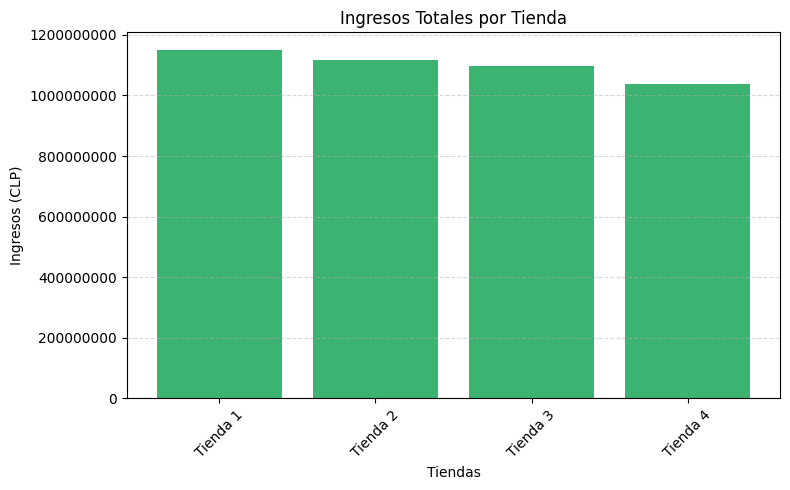

In [26]:
#Graficando el ingreso total por tiendas

import matplotlib.pyplot as plt

# Ingresos totales
ingresos = [
    tienda['Precio'].sum(),
    tienda2['Precio'].sum(),
    tienda3['Precio'].sum(),
    tienda4['Precio'].sum()
]

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.figure(figsize=(8, 5))
plt.bar(tiendas, ingresos, color='mediumseagreen')
plt.title('Ingresos Totales por Tienda')
plt.ylabel('Ingresos (CLP)')
plt.xlabel('Tiendas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ticklabel_format(style='plain', axis='y')  # Para que no use notaci√≥n cient√≠fica
plt.tight_layout()
plt.show()

# 2. Ventas por categor√≠a

In [ ]:
# Mostrar el top 5 de productos m√°s vendidos por tienda
def mostrar_top_categorias(tienda_df, nombre_tienda):
    top_categorias = tienda_df['Categor√≠a del Producto'].value_counts().head(5)
    print(f"\nTop 5 categor√≠as m√°s populares en {nombre_tienda}:")
    for categoria, cantidad in top_categorias.items():
        print(f"- {categoria}: {cantidad} ventas")

mostrar_top_categorias(tienda, "Tienda 1")
mostrar_top_categorias(tienda2, "Tienda 2")
mostrar_top_categorias(tienda3, "Tienda 3")
mostrar_top_categorias(tienda4, "Tienda 4")


Top 5 categor√≠as m√°s populares en Tienda 1:
- Muebles: 465 ventas
- Electr√≥nicos: 448 ventas
- Juguetes: 324 ventas
- Electrodom√©sticos: 312 ventas
- Deportes y diversi√≥n: 284 ventas

Top 5 categor√≠as m√°s populares en Tienda 2:
- Muebles: 442 ventas
- Electr√≥nicos: 422 ventas
- Juguetes: 313 ventas
- Electrodom√©sticos: 305 ventas
- Deportes y diversi√≥n: 275 ventas

Top 5 categor√≠as m√°s populares en Tienda 3:
- Muebles: 499 ventas
- Electr√≥nicos: 451 ventas
- Juguetes: 315 ventas
- Electrodom√©sticos: 278 ventas
- Deportes y diversi√≥n: 277 ventas

Top 5 categor√≠as m√°s populares en Tienda 4:
- Muebles: 480 ventas
- Electr√≥nicos: 451 ventas
- Juguetes: 338 ventas
- Deportes y diversi√≥n: 277 ventas
- Electrodom√©sticos: 254 ventas


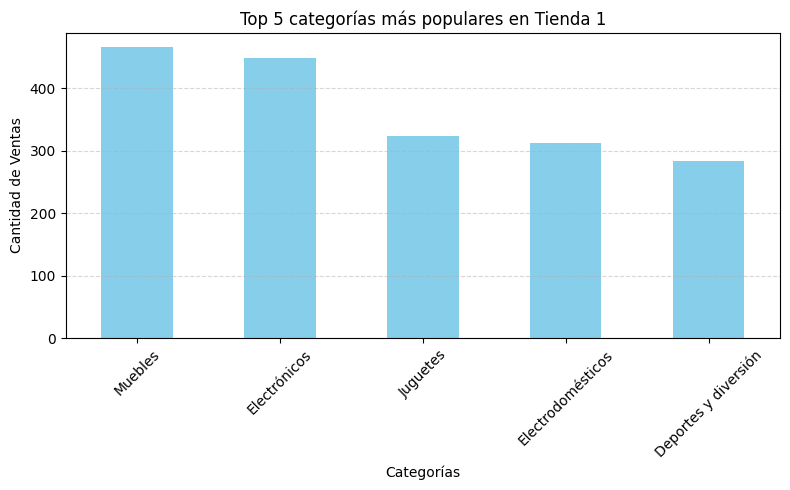

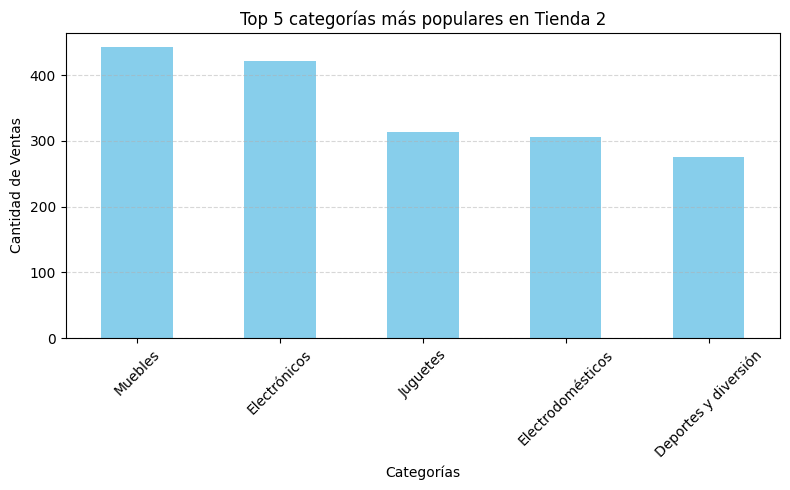

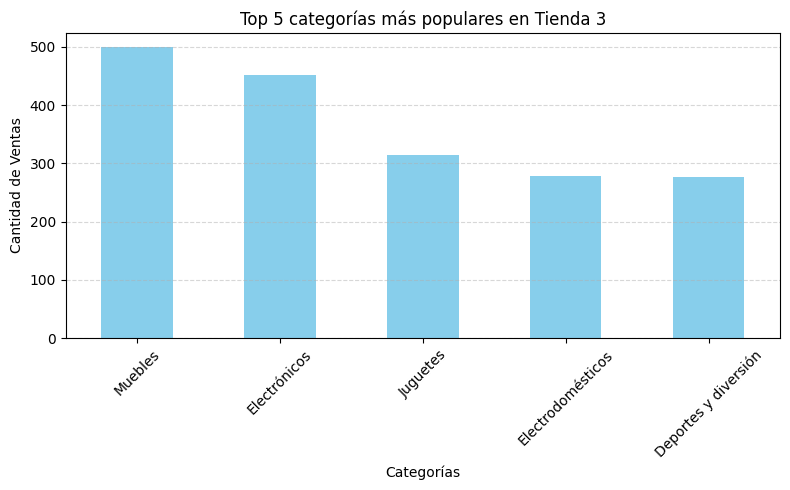

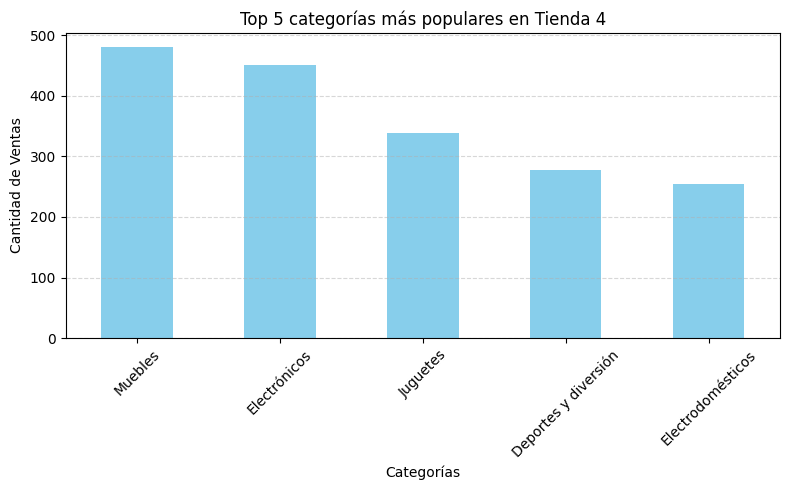

In [27]:
# Graficando el top 5 de productos m√°s vendidos por tienda
def graficar_top_categorias(tienda_df, nombre_tienda):
    top_categorias = tienda_df['Categor√≠a del Producto'].value_counts().head(5)
    plt.figure(figsize=(8, 5))
    top_categorias.plot(kind='bar', color='skyblue')
    plt.title(f'Top 5 categor√≠as m√°s populares en {nombre_tienda}')
    plt.ylabel('Cantidad de Ventas')
    plt.xlabel('Categor√≠as')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
graficar_top_categorias(tienda, "Tienda 1")
graficar_top_categorias(tienda2, "Tienda 2")
graficar_top_categorias(tienda3, "Tienda 3")
graficar_top_categorias(tienda4, "Tienda 4")

# 3. Calificaci√≥n promedio de la tienda


In [28]:
#Calificaci√≥n promedio de cada tienda
calificacion_tienda_1 = tienda['Calificaci√≥n'].mean()
calificacion_tienda_2 = tienda2['Calificaci√≥n'].mean()
calificacion_tienda_3 = tienda3['Calificaci√≥n'].mean()
calificacion_tienda_4 = tienda4['Calificaci√≥n'].mean()
# Mostrar resultados 
print("\nCalificaci√≥n promedio por tienda:")

print(f"‚≠ê Calificaci√≥n promedio Tienda 1: {calificacion_tienda_1:.2f}")
print(f"‚≠ê Calificaci√≥n promedio Tienda 2: {calificacion_tienda_2:.2f}")
print(f"‚≠ê Calificaci√≥n promedio Tienda 3: {calificacion_tienda_3:.2f}")
print(f"‚≠ê Calificaci√≥n promedio Tienda 4: {calificacion_tienda_4:.2f}")



Calificaci√≥n promedio por tienda:
‚≠ê Calificaci√≥n promedio Tienda 1: 3.98
‚≠ê Calificaci√≥n promedio Tienda 2: 4.04
‚≠ê Calificaci√≥n promedio Tienda 3: 4.05
‚≠ê Calificaci√≥n promedio Tienda 4: 4.00


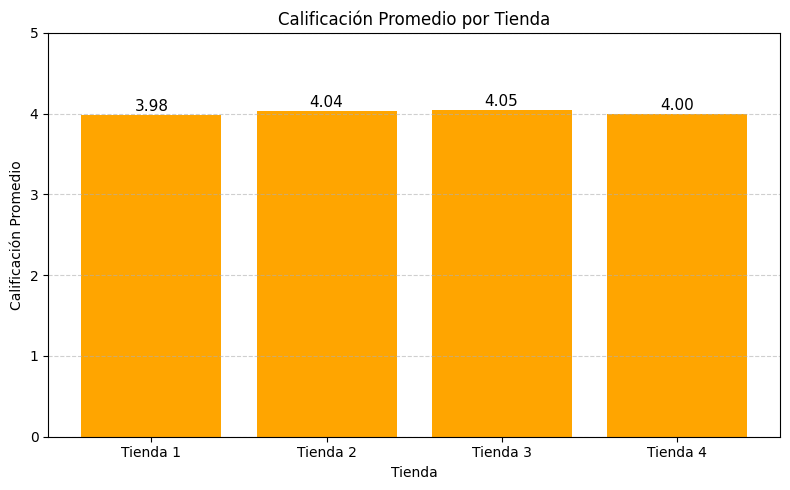

In [31]:
# Graficando la calificaci√≥n promedio de cada tienda
# Datos
calificaciones_promedio = [
    tienda['Calificaci√≥n'].mean(),
    tienda2['Calificaci√≥n'].mean(),
    tienda3['Calificaci√≥n'].mean(),
    tienda4['Calificaci√≥n'].mean()
]

nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Gr√°fico
plt.figure(figsize=(8,5))
plt.bar(nombres_tiendas, calificaciones_promedio, color='orange')
plt.title('Calificaci√≥n Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificaci√≥n Promedio')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.6)
for i, cal in enumerate(calificaciones_promedio):
    plt.text(i, cal + 0.05, f"{cal:.2f}", ha='center', fontsize=11)

plt.tight_layout()
plt.show()


# 4. Productos m√°s y menos vendidos

In [33]:
# Funci√≥n para mostrar el m√°s y menos vendido + graficar
def analizar_ventas_por_producto(df, nombre_tienda):
    ventas = df['Producto'].value_counts()
    producto_mas_vendido = ventas.idxmax()
    producto_menos_vendido = ventas.idxmin()

    print(f"üìä {nombre_tienda}")
    print(f"üîº M√°s vendido: {producto_mas_vendido} ({ventas.max()} ventas)")
    print(f"üîΩ Menos vendido: {producto_menos_vendido} ({ventas.min()} venta(s))")
    print("-------------------------")
# Aplicamos a cada tienda
analizar_ventas_por_producto(tienda, 'Tienda 1')
analizar_ventas_por_producto(tienda2, 'Tienda 2')
analizar_ventas_por_producto(tienda3, 'Tienda 3')
analizar_ventas_por_producto(tienda4, 'Tienda 4')

üìä Tienda 1
üîº M√°s vendido: Microondas (60 ventas)
üîΩ Menos vendido: Auriculares con micr√≥fono (33 venta(s))
-------------------------
üìä Tienda 2
üîº M√°s vendido: Iniciando en programaci√≥n (65 ventas)
üîΩ Menos vendido: Juego de mesa (32 venta(s))
-------------------------
üìä Tienda 3
üîº M√°s vendido: Kit de bancas (57 ventas)
üîΩ Menos vendido: Bloques de construcci√≥n (35 venta(s))
-------------------------
üìä Tienda 4
üîº M√°s vendido: Cama box (62 ventas)
üîΩ Menos vendido: Guitarra el√©ctrica (33 venta(s))
-------------------------


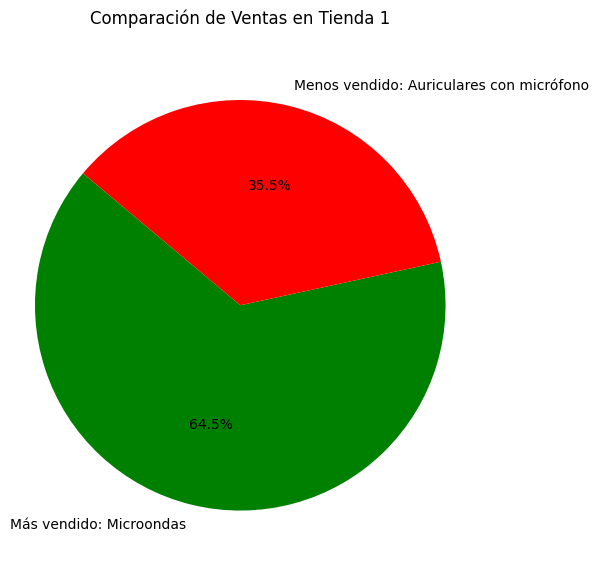

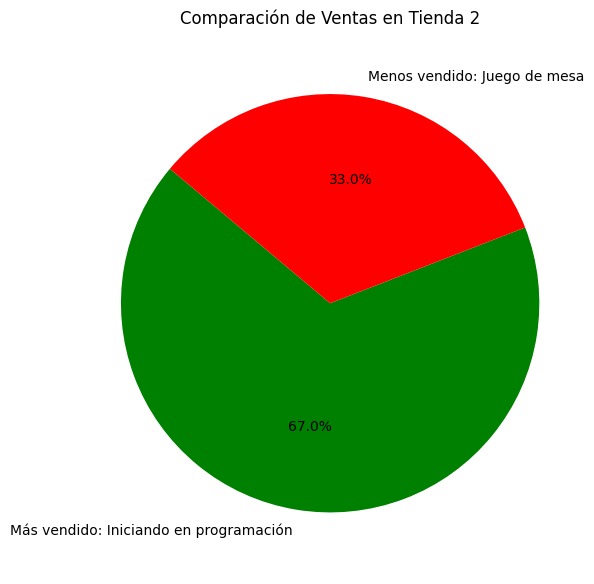

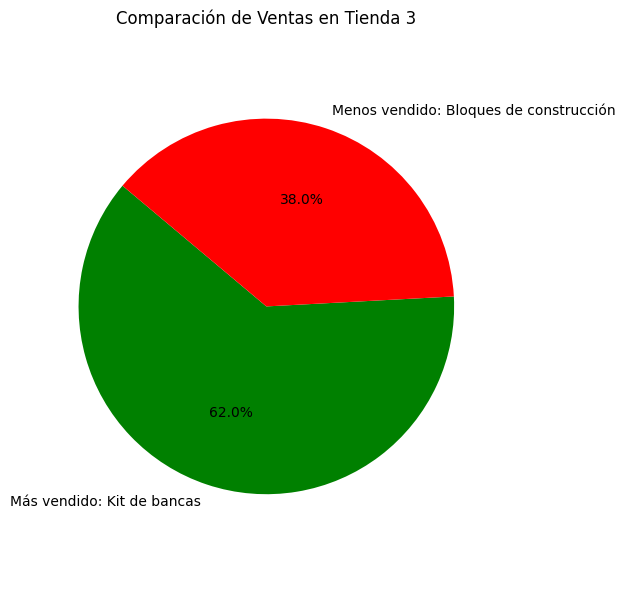

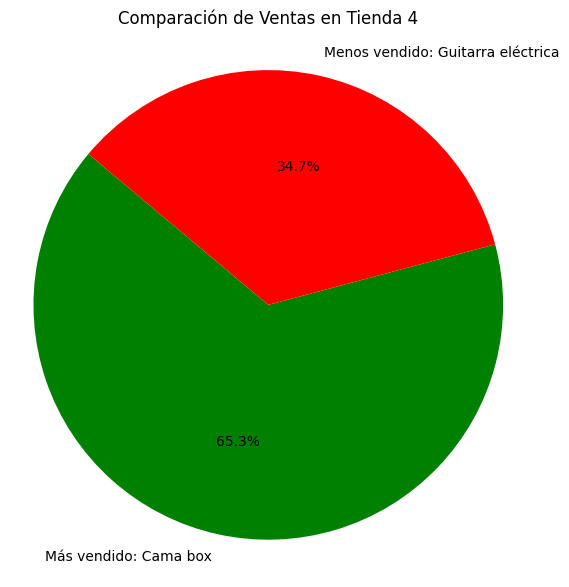

In [40]:
# Graficando el producto m√°s y menos vendido por tienda con etiquetas
def graficar_ventas_por_producto_pie(df, nombre_tienda):
    ventas = df['Producto'].value_counts()
    producto_mas_vendido = ventas.idxmax()
    producto_menos_vendido = ventas.idxmin()
    cantidad_mas = ventas.max()
    cantidad_menos = ventas.min()

    labels = [f'M√°s vendido: {producto_mas_vendido}', f'Menos vendido: {producto_menos_vendido}']
    sizes = [cantidad_mas, cantidad_menos]
    colors = ['green', 'red']

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Comparaci√≥n de Ventas en {nombre_tienda}')
    plt.axis('equal')  # C√≠rculo perfecto
    plt.tight_layout()
    plt.show()

# Ejecutar para cada tienda
graficar_ventas_por_producto_pie(tienda, 'Tienda 1')
graficar_ventas_por_producto_pie(tienda2, 'Tienda 2')
graficar_ventas_por_producto_pie(tienda3, 'Tienda 3')
graficar_ventas_por_producto_pie(tienda4, 'Tienda 4')

# 5. Env√≠o promedio por tienda

In [ ]:
# C√°lculo del costo de env√≠o promedio por tienda
costo_envio_promedio = {
    'EL costo Promedio para la Tienda 1': tienda['Costo de env√≠o'].mean(),
    'EL costo Promedio para la Tienda 2': tienda2['Costo de env√≠o'].mean(),
    'EL costo Promedio para la Tienda 3': tienda3['Costo de env√≠o'].mean(),
    'EL costo Promedio para la Tienda 4': tienda4['Costo de env√≠o'].mean(),
}

# Mostrar en consola con formato CLP
for tienda, costo in costo_envio_promedio.items():
    print(f"{tienda}: ${costo:,.0f} CLP")

Tienda 1: $26,019 CLP
Tienda 2: $25,216 CLP
Tienda 3: $24,806 CLP
Tienda 4: $23,459 CLP


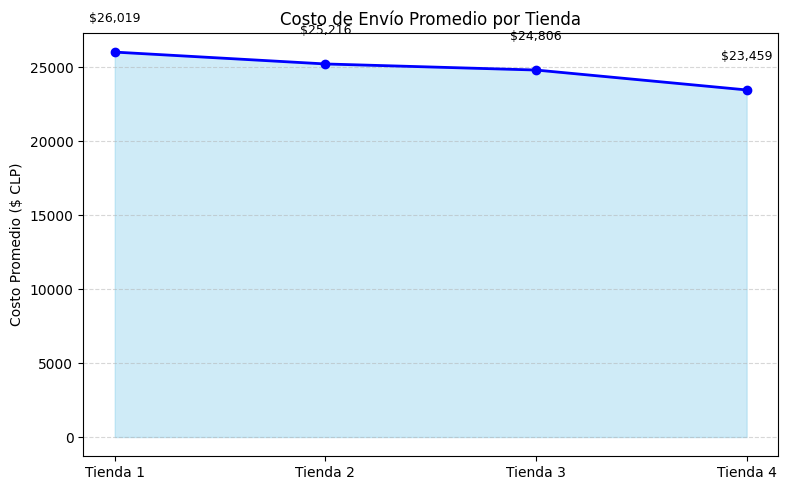

In [42]:
# Gr√°fico de √°rea para representar el costo promedio de env√≠o
def graficar_area_costos_envio(costo_dict):
    tiendas = list(costo_dict.keys())
    costos = list(costo_dict.values())

    plt.figure(figsize=(8, 5))
    plt.fill_between(tiendas, costos, color='skyblue', alpha=0.4)
    plt.plot(tiendas, costos, marker='o', color='blue', linewidth=2)
    plt.title('Costo de Env√≠o Promedio por Tienda')
    plt.ylabel('Costo Promedio ($ CLP)')
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    for i, costo in enumerate(costos):
        plt.text(i, costo + 2000, f"${costo:,.0f}", ha='center', fontsize=9, color='black')

    plt.tight_layout()
    plt.show()

# Ejecutar gr√°fica
graficar_area_costos_envio(costo_envio_promedio)

# üìà Informe Final de An√°lisis de Tiendas - Alura Store

## üß≠ Introducci√≥n

El objetivo de este an√°lisis fue determinar cu√°l de las cuatro tiendas disponibles representa la mejor opci√≥n para que el Sr. Juan comercialice sus productos. Para esto, se realizaron estudios detallados de distintos factores clave: facturaci√≥n total, categor√≠as de productos m√°s vendidos, calificaci√≥n promedio de los clientes, productos m√°s y menos vendidos, y el costo promedio de env√≠o. A trav√©s de gr√°ficos y an√°lisis num√©ricos, se obtuvo una visi√≥n completa del desempe√±o de cada tienda.

---

## üìä Desarrollo del An√°lisis

### üí∞ Ingresos Totales

Los ingresos totales por tienda fueron los siguientes:

- **Tienda 1**: $1.150.880.400 CLP
- **Tienda 2**: $1.116.343.500 CLP
- **Tienda 3**: $1.098.019.600 CLP
- **Tienda 4**: $1.038.375.700 CLP

üîç *Conclusi√≥n:* La **Tienda 1** lidera en facturaci√≥n, con m√°s de $1.150 millones de pesos, seguida por la Tienda 2.

---

### üõí Categor√≠as M√°s Populares

Se analizaron las cinco categor√≠as m√°s vendidas por tienda:

- **Tienda 1**:
  - Muebles (465)
  - Electr√≥nicos (448)
  - Juguetes (324)
  - Electrodom√©sticos (312)
  - Deportes y diversi√≥n (284)

- **Tienda 2**:
  - Muebles (442)
  - Electr√≥nicos (422)
  - Juguetes (313)
  - Electrodom√©sticos (305)
  - Deportes y diversi√≥n (275)

- **Tienda 3**:
  - Muebles (499)
  - Electr√≥nicos (451)
  - Juguetes (315)
  - Electrodom√©sticos (278)
  - Deportes y diversi√≥n (277)

- **Tienda 4**:
  - Muebles (480)
  - Electr√≥nicos (451)
  - Juguetes (338)
  - Deportes y diversi√≥n (277)
  - Electrodom√©sticos (254)

üîç *Conclusi√≥n:* Las categor√≠as m√°s fuertes en todas las tiendas son **Muebles** y **Electr√≥nicos**, siendo **Tienda 3** la que m√°s vendi√≥ en Muebles, y **Tienda 1** la m√°s balanceada.

---

### ‚≠ê Calificaci√≥n Promedio

Promedio de calificaciones dadas por los clientes:

- **Tienda 1**: 3.98
- **Tienda 2**: 4.04
- **Tienda 3**: 4.05
- **Tienda 4**: 4.00

üîç *Conclusi√≥n:* **Tienda 3** obtiene la mejor calificaci√≥n promedio por parte de los clientes, seguida muy de cerca por la Tienda 2.

---

### üèÜ Productos M√°s y Menos Vendidos

Resumen de los productos m√°s populares y los menos vendidos:

- **Tienda 1**: 
  - üîº *M√°s vendido*: Microondas (60 ventas)
  - üîΩ *Menos vendido*: Auriculares con micr√≥fono (33 ventas)

- **Tienda 2**:
  - üîº *M√°s vendido*: Iniciando en programaci√≥n (65 ventas)
  - üîΩ *Menos vendido*: Juego de mesa (32 ventas)

- **Tienda 3**:
  - üîº *M√°s vendido*: Kit de bancas (57 ventas)
  - üîΩ *Menos vendido*: Bloques de construcci√≥n (35 ventas)

- **Tienda 4**:
  - üîº *M√°s vendido*: Cama box (62 ventas)
  - üîΩ *Menos vendido*: Guitarra el√©ctrica (33 ventas)

üîç *Conclusi√≥n:* Todas las tiendas muestran buena rotaci√≥n en productos de gran demanda, con diferencias m√≠nimas entre sus top de ventas.

---

### üöö Costo Promedio de Env√≠o

Costo de env√≠o promedio por tienda:

- **Tienda 1**: $26.019 CLP
- **Tienda 2**: $25.216 CLP
- **Tienda 3**: $24.806 CLP
- **Tienda 4**: $23.459 CLP

üîç *Conclusi√≥n:* La **Tienda 4** tiene el menor costo de env√≠o promedio, lo cual puede representar un atractivo adicional para los clientes.

---

## ‚úÖ Conclusi√≥n y Recomendaci√≥n

Luego de considerar todos los factores analizados, se concluye que la mejor opci√≥n para el Sr. Juan es **la Tienda 1**. Esta tienda destaca por:

- Tener **la facturaci√≥n m√°s alta**, superando los $1.150 millones de CLP.
- Mantener un **balance s√≥lido entre todas las categor√≠as de productos**.
- Presentar un **alto volumen de ventas en m√∫ltiples productos populares**.
- Obtener una **muy buena calificaci√≥n promedio de clientes (3.98)**, aunque no la m√°s alta.
- Aunque su costo de env√≠o es el m√°s alto, este no parece afectar negativamente el volumen de ventas.

**Recomendaci√≥n Final:**  
‚úÖ El Sr. Juan deber√≠a vender sus productos en **Tienda 1**, ya que esta demuestra un rendimiento comercial robusto, liderazgo en ingresos y gran demanda de productos, lo que representa la mayor oportunidad de √©xito para sus ventas.

---




# 6. Parte extra 

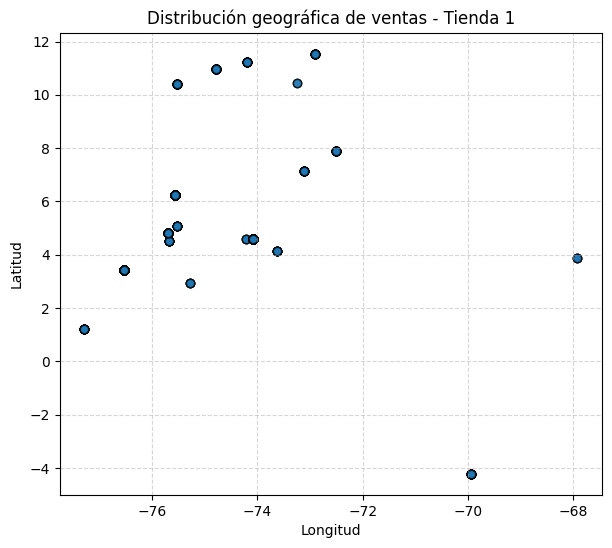

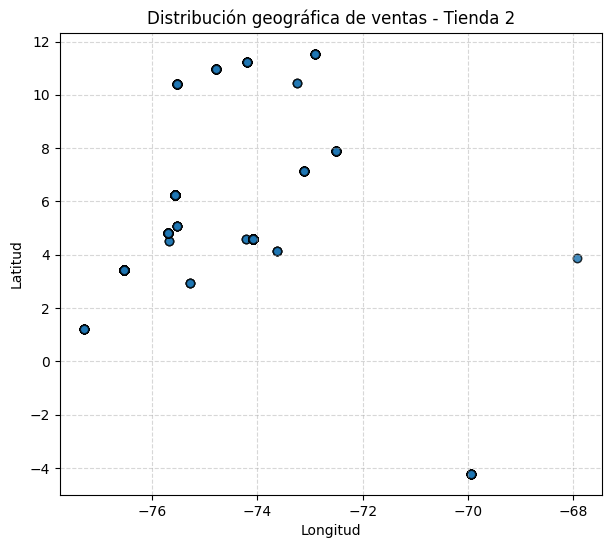

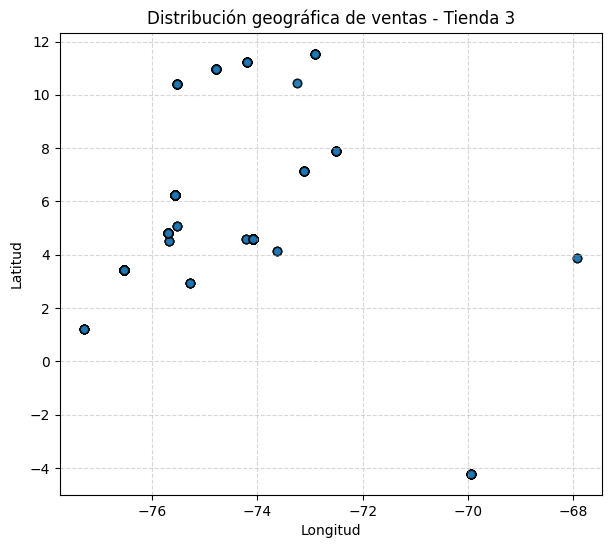

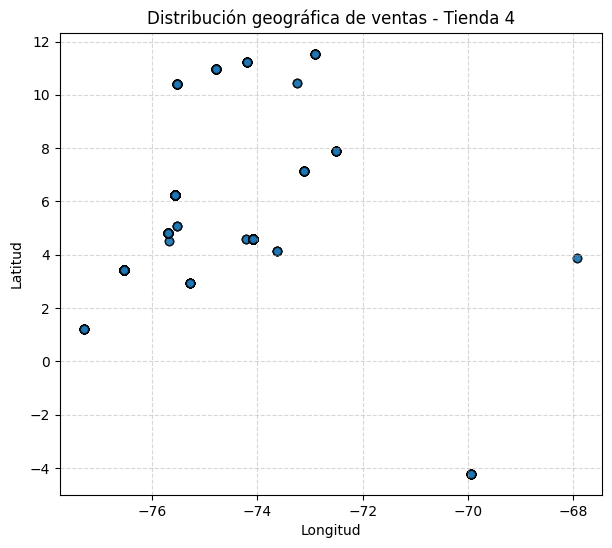

In [ ]:
# Funci√≥n para graficar scatter geogr√°fico de una tienda
def graficar_distribucion_geografica(df, nombre_tienda):
    plt.figure(figsize=(7, 6))
    plt.scatter(df['lon'], df['lat'], alpha=0.6, edgecolors='k')
    plt.title(f'Distribuci√≥n geogr√°fica de ventas - {nombre_tienda}')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Aplicar por tienda
graficar_distribucion_geografica(tienda, 'Tienda 1')
graficar_distribucion_geografica(tienda2, 'Tienda 2')
graficar_distribucion_geografica(tienda3, 'Tienda 3')
graficar_distribucion_geografica(tienda4, 'Tienda 4')


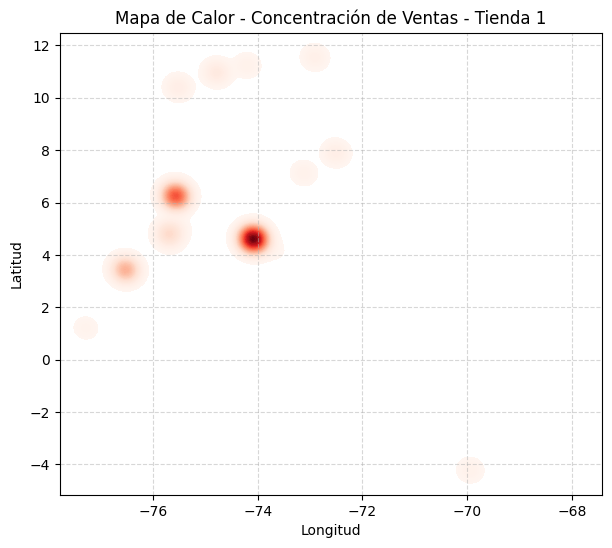

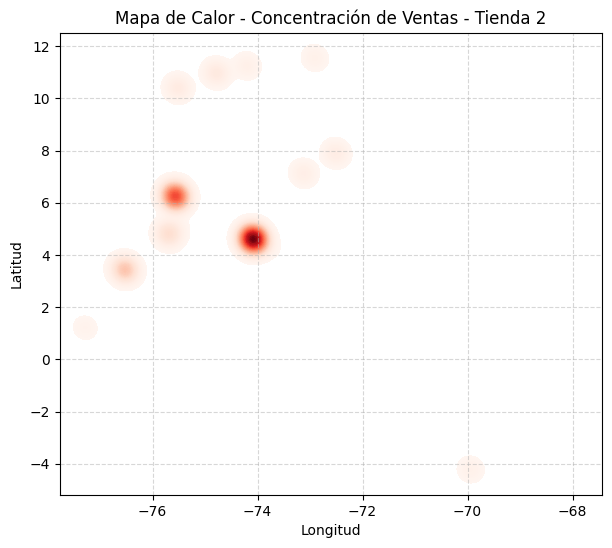

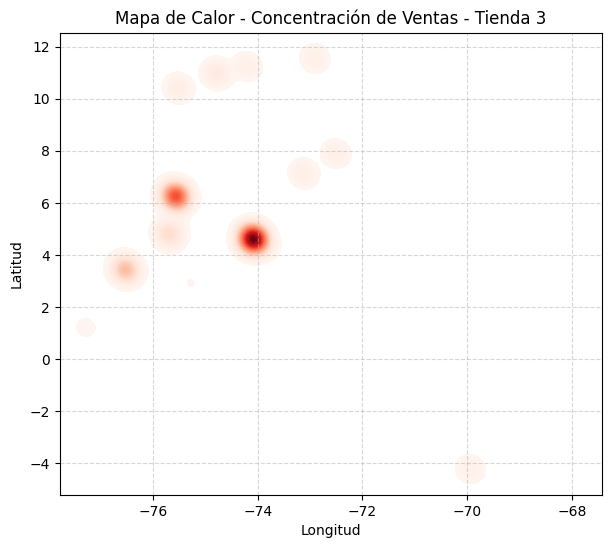

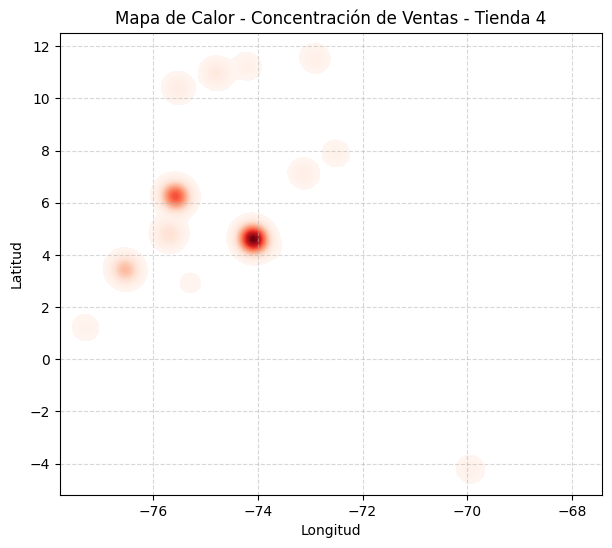

In [51]:
import seaborn as sns

# Funci√≥n para graficar un mapa de calor por tienda
def graficar_heatmap_ventas(df, nombre_tienda):
    plt.figure(figsize=(7, 6))
    sns.kdeplot(
        x=df['lon'], y=df['lat'],
        cmap="Reds", fill=True, bw_adjust=0.5, thresh=0.05, levels=100
    )
    plt.title(f'Mapa de Calor - Concentraci√≥n de Ventas - {nombre_tienda}')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Ejecutar mapas de calor por tienda
graficar_heatmap_ventas(tienda, 'Tienda 1')
graficar_heatmap_ventas(tienda2, 'Tienda 2')
graficar_heatmap_ventas(tienda3, 'Tienda 3')
graficar_heatmap_ventas(tienda4, 'Tienda 4')



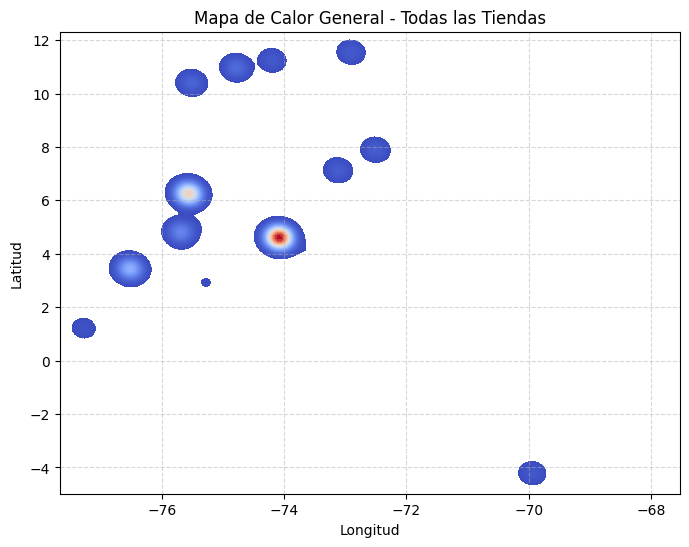

In [52]:
# Unimos todas las tiendas
tiendas_combinadas = pd.concat([tienda, tienda2, tienda3, tienda4])

# Mapa de calor general
plt.figure(figsize=(8, 6))
sns.kdeplot(
    x=tiendas_combinadas['lon'], y=tiendas_combinadas['lat'],
    cmap="coolwarm", fill=True, bw_adjust=0.5, thresh=0.05, levels=100
)
plt.title('Mapa de Calor General - Todas las Tiendas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()